In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('covid.csv')
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [3]:
X=df.drop('diagnosis',axis=1)
X.head()

,no,pc,wbc,mc,ast,bc,ldh
0,1,Low,Low,Low,High,Normal,Normal
1,2,Low,Low,Normal,High,Normal,High
2,3,Low,High,Normal,High,Normal,Normal
3,4,Low,High,Normal,High,High,Normal
4,5,Low,Normal,High,High,Normal,Normal


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [5]:
pc=le.fit_transform(df['pc'].values)
wbc=le.fit_transform(df['wbc'].values)
mc=le.fit_transform(df['mc'].values)
ast=le.fit_transform(df['ast'].values)
bc=le.fit_transform(df['bc'].values)
ldh=le.fit_transform(df['ldh'].values)

In [6]:
Y=le.fit_transform(df['diagnosis'].values)

In [7]:
import numpy as np
X = np.array(list(zip(pc,wbc,mc,ast,bc,ldh)))
X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=111)

In [9]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

#training
model.fit(X_train, Y_train)
#testing
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("\nReport")
print(classification_report(Y_test,y_pred))

Accuracy: 0.8

Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



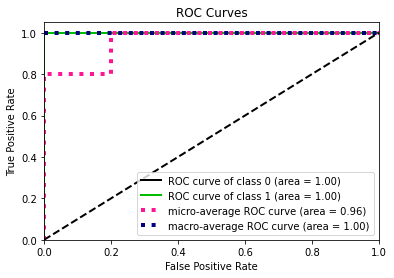

In [11]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_prob = model.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_prob)
plt.show()